In [1]:
import os
import re
import matplotlib.pyplot as plt

def extract_keff_and_error(file_path):
    with open(file_path, 'r') as f:
        for line in f:
            if 'ANA_KEFF' in line:
                try:
                    keff_val = float(line[47:58])
                    keff_err = float(line[59:66])
                    return keff_val, keff_err
                except ValueError:
                    pass
    return None, None

def get_numeric_suffix(filename):
    # Match something like: fission_blanket_hex_10_res.m → 10
    #match = re.search(r'fission_blanket_hex_(\d+)_res\.m$', filename)
    #match = re.search(r'input_(\d+)_(\d+)_(d+)\.txt_res\.m$', filename)
    #return int(match.group(1)) if match else float('inf')
    match = re.search(r'input(\d+)_15_(\d+)\.txt_res', filename)
    return match.group(1) if match else ""

def read_keff_from_folder(folder_path):
    keff_values = []
    keff_errors = []
    numeric_labels = []

    all_files = [f for f in os.listdir(folder_path) if f.endswith('_res.m')]
    sorted_files = sorted(all_files, key=get_numeric_suffix)

    for file_name in sorted_files:
        number = get_numeric_suffix(file_name)
        file_path = os.path.join(folder_path, file_name)
        keff, err = extract_keff_and_error(file_path)
        if keff is not None:
            keff_values.append(keff)
            keff_errors.append(err)
            numeric_labels.append(number)

    return numeric_labels, keff_values, keff_errors

def plot_keff(labels, keff_values, keff_errors):
    if not labels:
        print("[ERROR] No keff data found.")
        return
    plt.figure(figsize=(10, 5))
    plt.errorbar(labels, keff_values, yerr=keff_errors, fmt='o-', capsize=5)
    plt.xticks(labels)
    plt.xlabel('Reflector Thickness [cm]')
    plt.ylabel('keff')
    plt.title('Optimal Reflector Thickness')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Your folder here ===
folder_path = '/Users/maxle/Desktop/Desktop2/Dual/10_15_20' 


#labels, keff_values, keff_errors = read_keff_from_folder(folder_path)
#plot_keff(labels, keff_values, keff_errors)




In [6]:
import numpy as np
klist5 = []
klist10 = []
klist15 = []
klist20 = []
range_outer = np.arange(0,60, 10)
range_inner = np.arange(0,40,10)
print(range_inner)

[ 0 10 20 30]


In [7]:
for i in range_outer:
     for j in range_inner:
          klist5.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/5/{i}_5_{j}')[1])
          klist10.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/10/{i}_10_{j}')[1])
          klist15.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/15/{i}_15_{j}')[1])
          klist20.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/20/{i}_20_{j}')[1])
          

In [11]:
innerlist = [0, 10, 20, 30, 0, 10, 20, 30, 0, 10, 20, 30, 0, 10, 20, 30, 0, 10, 20, 30, 0, 10, 20, 30]
len(innerlist)

24

In [12]:
outerlist = [0, 0, 0, 0, 10, 10, 10, 10, 20, 20, 20, 20, 30, 30, 30, 30, 40, 40, 40, 40, 50, 50, 50, 50]
len(outerlist)

24

In [13]:

def cylvol(inner, outer, fis_radius, height = 100):
     fus_radius = 25 #25 cm of fusion core radius
     shell_vol = np.pi * height * (((inner + fus_radius)**2 - fus_radius**2) + ((outer + fis_radius + inner + fus_radius)**2 - (fis_radius + inner + fus_radius)**2))
     cap_vol = np.pi * 2 * outer * (outer + fis_radius + inner + fus_radius)**2
     tot_vol = shell_vol + cap_vol
     return tot_vol, shell_vol, cap_vol


In [14]:
volume_list5 = []
volume_list10 = []
volume_list15 = []
volume_list20 = []
for i in range(len(klist5)):
    volume_list5.append(cylvol(innerlist[i], outerlist[i], 5)[0])
    volume_list10.append(cylvol(innerlist[i], outerlist[i], 10)[0])
    volume_list15.append(cylvol(innerlist[i], outerlist[i], 15)[0])
    volume_list20.append(cylvol(innerlist[i], outerlist[i], 20)[0])

In [17]:
def vol_to_tonne(volume, rho):
     tonnes = volume * rho * 1e-6
     return tonnes

In [65]:
UN_rho = 14.31
Zr_rho = 8.57
fuel_pin_mass = np.pi * 1000 * ((0.645**2 * UN_rho) + ((0.645 + 0.6675 + 0.75)**2 - (0.645 + 0.6675)**2) * Zr_rho) #Cylinder volume for concentric cylinders. First one is an initial cylinder with a density of 14.1, and the other is the 1Zr with a density of 8.57
fuel_pin_volume = np.pi * 1000 * (0.645 + 0.6675 + 0.75)**2
Li_rho = 0.516
C_rho = 1.7
Zr7_rho = 2.571
heat_pipe_mass = np.pi * 1000 * (0.64**2 * Li_rho + ((0.64 + 0.66)**2 - (0.64)**2) * Zr7_rho + ((0.64 + 0.66 + 0.71)**2 - (0.64 + 0.66)**2) * Li_rho + ((0.64 + 0.66 + 0.71 + 0.75)**2 - (0.64 + 0.66 + 0.71)**2) * Zr_rho)
hollow_heat_pipe_mass = np.pi * 1000 * (0.64**2 * 0 + ((0.64 + 0.66)**2 - (0.64)**2) * Zr7_rho + ((0.64 + 0.66 + 0.71)**2 - (0.64 + 0.66)**2) * Li_rho + ((0.64 + 0.66 + 0.71 + 0.75)**2 - (0.64 + 0.66 + 0.71)**2) * Zr_rho)
heat_pipe_volume = np.pi * 1000 * (0.64 + 0.66 + 0.71 + 0.75)**2
print(heat_pipe_mass, hollow_heat_pipe_mass)

111134.11846584802 110470.13154877826


In [73]:
fuel_pins5 = 254 
fuel_pins10 = 656
fuel_pins15 = 1144
fuel_pins20 = 1638 #These are all hard coded, taken from the number given Alik gave me
heat_pipes5 = 88
heat_pipes10 = 220
heat_pipes15 = 386
heat_pipes20 = 552 #Similarly hard coded
pins_list = 6 * [fuel_pins5, fuel_pins10, fuel_pins15, fuel_pins20]
pipes_list = 6 * [heat_pipes5, heat_pipes10, heat_pipes15, heat_pipes20]
blanket_thickness = 6 * [5, 10, 15, 20]

In [83]:
def blanket_mass(height, pins, pin_mass, pin_volume, pipes, pipe_mass, pipe_volume, inner, thickness, filler_rho):
     mass = pins * pin_mass + pipes * pipe_mass + (np.pi * height * ((25 + inner + thickness)**2 - (25 + inner)**2) - pins * pin_volume - pipes * pipe_volume) * filler_rho
     return mass

In [91]:
blanket_list = []
for i in range(len(pins_list)): #pins list is arbitrary, they're all the same size
     blanket_list.append((blanket_mass(1000, pins_list[i], fuel_pin_mass, fuel_pin_volume, pipes_list[i], hollow_heat_pipe_mass, heat_pipe_volume, innerlist[i], blanket_thickness[i], C_rho)) * 1e-6)
print(blanket_list)

[23.89996797132907, 61.69756374660811, 108.71861108648861, 157.4596393679409, 23.89996797132907, 61.69756374660811, 108.71861108648861, 157.4596393679409, 23.89996797132907, 61.69756374660811, 108.71861108648861, 157.4596393679409, 23.89996797132907, 61.69756374660811, 108.71861108648861, 157.4596393679409, 23.89996797132907, 61.69756374660811, 108.71861108648861, 157.4596393679409, 23.89996797132907, 61.69756374660811, 108.71861108648861, 157.4596393679409]


In [95]:
tonne_list5 = []
tonne_list10 = []
tonne_list15 = []
tonne_list20 = []
for i in range(len(volume_list5)):
     tonne_list5.append(vol_to_tonne(volume_list5[i], C_rho))
     tonne_list10.append(vol_to_tonne(volume_list10[i], C_rho))
     tonne_list15.append(vol_to_tonne(volume_list15[i], C_rho))
     tonne_list20.append(vol_to_tonne(volume_list20[i], C_rho))


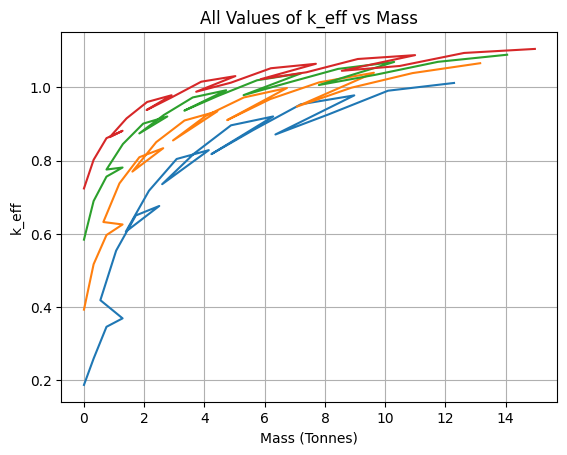

In [96]:
ax1 = plt.axes()
ax1.grid()
ax1.set_xlabel('Mass (Tonnes)')
ax1.set_ylabel('k_eff')
ax1.set_title('All Values of k_eff vs Mass')
ax1.plot(tonne_list5, klist5)
ax1.plot(tonne_list10, klist10)
ax1.plot(tonne_list15, klist15)
ax1.plot(tonne_list20, klist20)

In [97]:
def remove_backtracking(list1, list2):
    """
    Removes entries from both lists that would cause backtracking in list1.
    Both lists must be of the same length.
    """
    if len(list1) != len(list2):
        raise ValueError("Lists must be of the same length")
    
    # Extract values from nested lists in list1
    values1 = [x[0] if isinstance(x, list) else x for x in list1]
    
    result1 = []
    result2 = []
    
    # Add the first point
    current_max = values1[0]
    result1.append(list1[0])
    result2.append(list2[0])
    
    # Check each subsequent point
    for i in range(1, len(values1)):
        if values1[i] > current_max:  # Only keep points that increase
            current_max = values1[i]
            result1.append(list1[i])
            result2.append(list2[i])
    
    return result1, result2

In [98]:
#trim_list = klist
#trim_volume = volume_list
#trim_tonne = tonne_list

In [99]:
#trim_list, trim_tonne = remove_backtracking(trim_list, trim_tonne)

In [100]:
#ax2 = plt.axes()
#ax2.grid()
#ax2.set_xlabel('Mass (Tonnes)')
#ax2.set_ylabel('k_eff')
#ax2.set_title('Only increasing k_eff Values vs Mass')
#ax2.plot(trim_tonne, trim_list)

Text(0.5, 1.0, 'Segmented Outer Radii (cm) vs Mass (tonnes)')

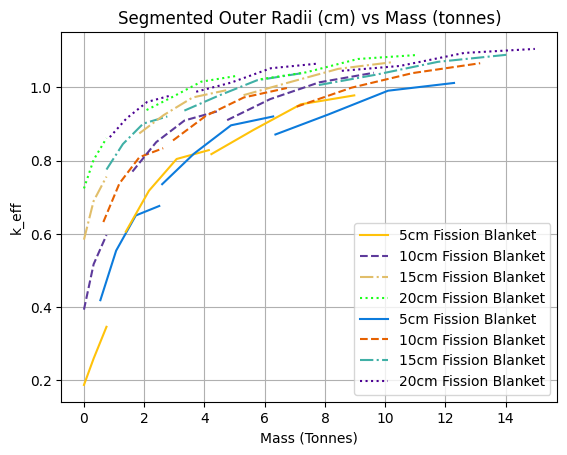

In [101]:
ax3 = plt.axes()
ax3.plot(tonne_list5[:3], klist5[:3], label = '5cm Fission Blanket', ls = '-', c = '#FFC20A')
ax3.plot(tonne_list10[:3], klist10[:3], label = '10cm Fission Blanket', ls = '--', c = '#5D3A9B')
ax3.plot(tonne_list15[:3], klist15[:3], label = '15cm Fission Blanket', ls = '-.', c = '#E1BE6A')
ax3.plot(tonne_list20[:3], klist20[:3], label = '20cm Fission Blanket', ls = ':', c = '#1AFF1A')
ax3.plot(tonne_list5[4:8], klist5[4:8], label = '5cm Fission Blanket', ls = '-', c = '#0C7BDC')
ax3.plot(tonne_list10[4:8], klist10[4:8], label = '10cm Fission Blanket', ls = '--', c = '#E66100')
ax3.plot(tonne_list15[4:8], klist15[4:8], label = '15cm Fission Blanket', ls = '-.', c = '#40B0A6')
ax3.plot(tonne_list20[4:8], klist20[4:8], label = '20cm Fission Blanket', ls = ':', c = '#4B0092')
ax3.plot(tonne_list5[8:12], klist5[8:12], ls = '-', c = '#FFC20A')
ax3.plot(tonne_list10[8:12], klist10[8:12], ls = '--', c = '#5D3A9B')
ax3.plot(tonne_list15[8:12], klist15[8:12], ls = '-.', c = '#E1BE6A')
ax3.plot(tonne_list20[8:12], klist20[8:12], ls = ':', c = '#1AFF1A')
ax3.plot(tonne_list5[12:16], klist5[12:16], ls = '-', c = '#0C7BDC')
ax3.plot(tonne_list10[12:16], klist10[12:16], ls = '--', c = '#E66100')
ax3.plot(tonne_list15[12:16], klist15[12:16], ls = '-.', c = '#40B0A6')
ax3.plot(tonne_list20[12:16], klist20[12:16], ls = ':', c = '#4B0092')
ax3.plot(tonne_list5[16:20], klist5[16:20], ls = '-', c = '#FFC20A')
ax3.plot(tonne_list10[16:20], klist10[16:20], ls = '--', c = '#5D3A9B')
ax3.plot(tonne_list15[16:20], klist15[16:20], ls = '-.', c = '#E1BE6A')
ax3.plot(tonne_list20[16:20], klist20[16:20], ls = ':', c = '#1AFF1A')
ax3.plot(tonne_list5[20:24], klist5[20:24], ls = '-', c = '#0C7BDC')
ax3.plot(tonne_list10[20:24], klist10[20:24], ls = '--', c = '#E66100')
ax3.plot(tonne_list15[20:24], klist15[20:24], ls = '-.', c = '#40B0A6')
ax3.plot(tonne_list20[20:24], klist20[20:24], ls = ':', c = '#4B0092')
ax3.grid()
ax3.legend()
ax3.set_xlabel('Mass (Tonnes)')
ax3.set_ylabel('k_eff')
ax3.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')

Text(0.5, 1.0, 'Segmented Outer Radii (cm) vs Mass (tonnes)')

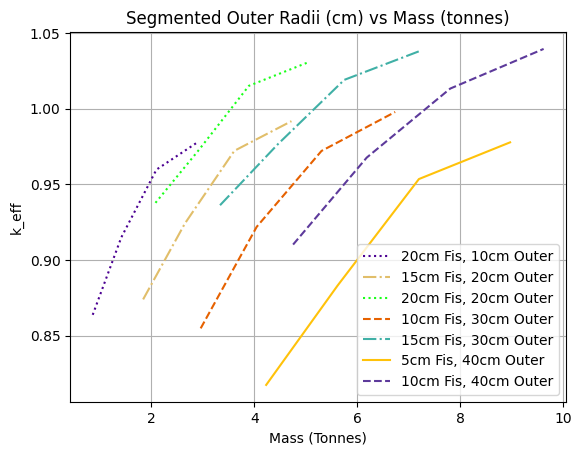

In [102]:
ax4 = plt.axes()
ax4.plot(tonne_list20[4:8], klist20[4:8], label = '20cm Fis, 10cm Outer', ls = ':', c = '#4B0092')
ax4.plot(tonne_list15[8:12], klist15[8:12], label = '15cm Fis, 20cm Outer', ls = '-.', c = '#E1BE6A')
ax4.plot(tonne_list20[8:12], klist20[8:12], label = '20cm Fis, 20cm Outer', ls = ':', c = '#1AFF1A')
ax4.plot(tonne_list10[12:16], klist10[12:16], label = '10cm Fis, 30cm Outer', ls = '--', c = '#E66100')
ax4.plot(tonne_list15[12:16], klist15[12:16], label = '15cm Fis, 30cm Outer', ls = '-.', c = '#40B0A6')
ax4.plot(tonne_list5[16:20], klist5[16:20], label = '5cm Fis, 40cm Outer', ls = '-', c = '#FFC20A')
ax4.plot(tonne_list10[16:20], klist10[16:20],label = '10cm Fis, 40cm Outer', ls = '--', c = '#5D3A9B')
ax4.grid()
ax4.legend()
ax4.set_xlabel('Mass (Tonnes)')
ax4.set_ylabel('k_eff')
ax4.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')